# |Rainfall Weather Forecasting-DS2306-Sudhanshu Kumar Singh -20-11-2023|

In [49]:
#Importing the required libraries 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#Loading the data 
data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/weatherAUS.csv")

In [51]:
#Baisc Information of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [52]:
#print 10 row of data set
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [53]:
# Statistical summary
print(data.describe().T)

                count         mean        std    min      25%     50%     75%  \
MinTemp        8350.0    13.193305   5.403596   -2.0     9.20    13.3    17.4   
MaxTemp        8365.0    23.859976   6.136408    8.2    19.30    23.3    28.0   
Rainfall       8185.0     2.805913  10.459379    0.0     0.00     0.0     1.0   
Evaporation    4913.0     5.389395   5.044484    0.0     2.60     4.6     7.0   
Sunshine       4431.0     7.632205   3.896235    0.0     4.75     8.7    10.7   
WindGustSpeed  7434.0    40.174469  14.665721    7.0    30.00    39.0    50.0   
WindSpeed9am   8349.0    13.847646  10.174579    0.0     6.00    13.0    20.0   
WindSpeed3pm   8318.0    18.533662   9.766986    0.0    11.00    19.0    24.0   
Humidity9am    8366.0    67.822496  16.833283   10.0    56.00    68.0    80.0   
Humidity3pm    8323.0    51.249790  18.423774    6.0    39.00    51.0    63.0   
Pressure9am    7116.0  1017.640233   6.828699  989.8  1013.00  1017.7  1022.3   
Pressure3pm    7113.0  1015.

In [54]:
# Drop unnecessary columns
data= data.drop(['Date', 'Location'], axis=1)


In [55]:
# Handle missing values
data = data.dropna()

In [56]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
data['RainToday'] = le.fit_transform(df['RainToday'])
data['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
data['WindGustDir'] = le.fit_transform(df['WindGustDir'])
data['WindDir9am'] = le.fit_transform(df['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
data['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
data['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])



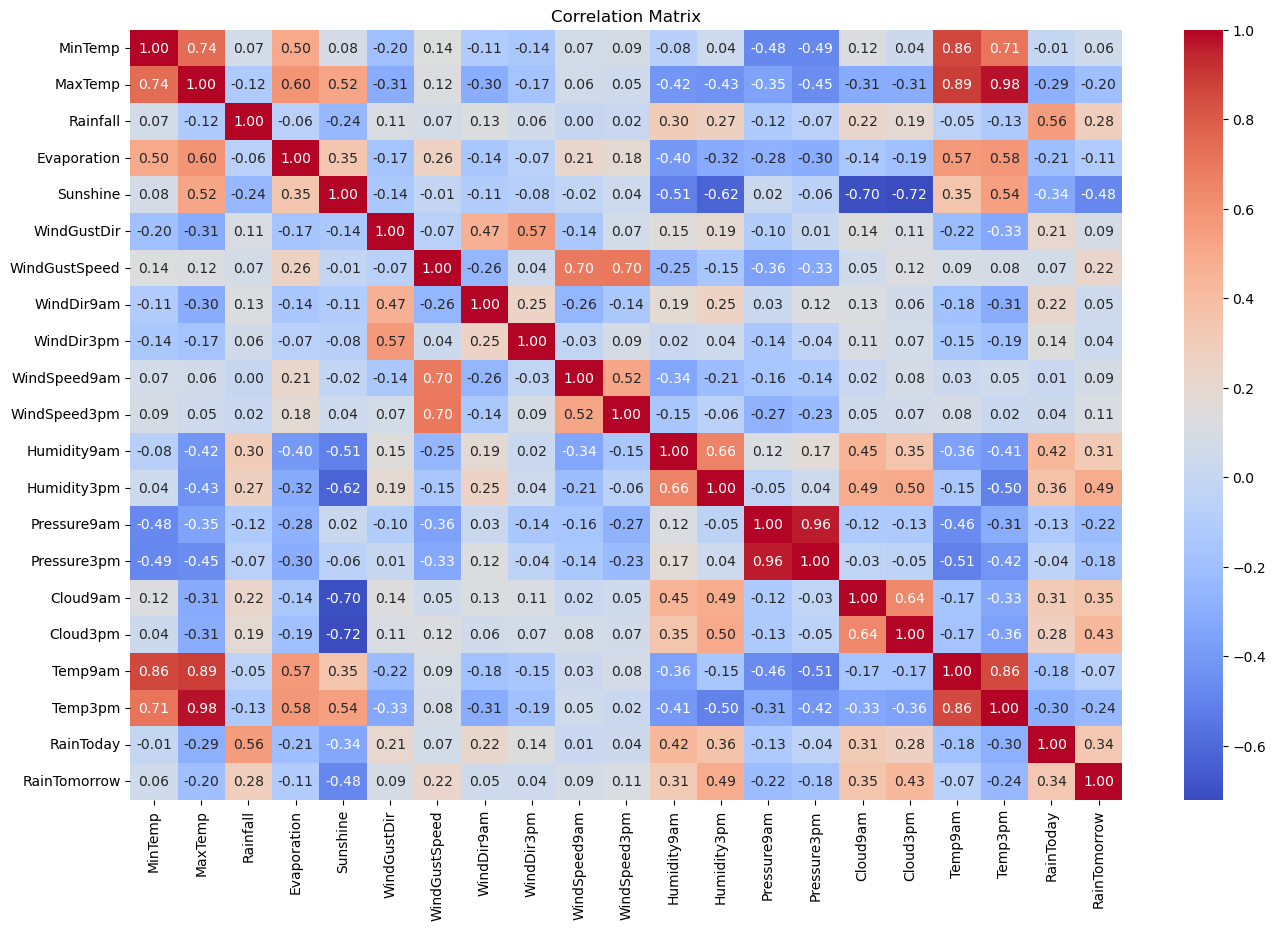

In [57]:
# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

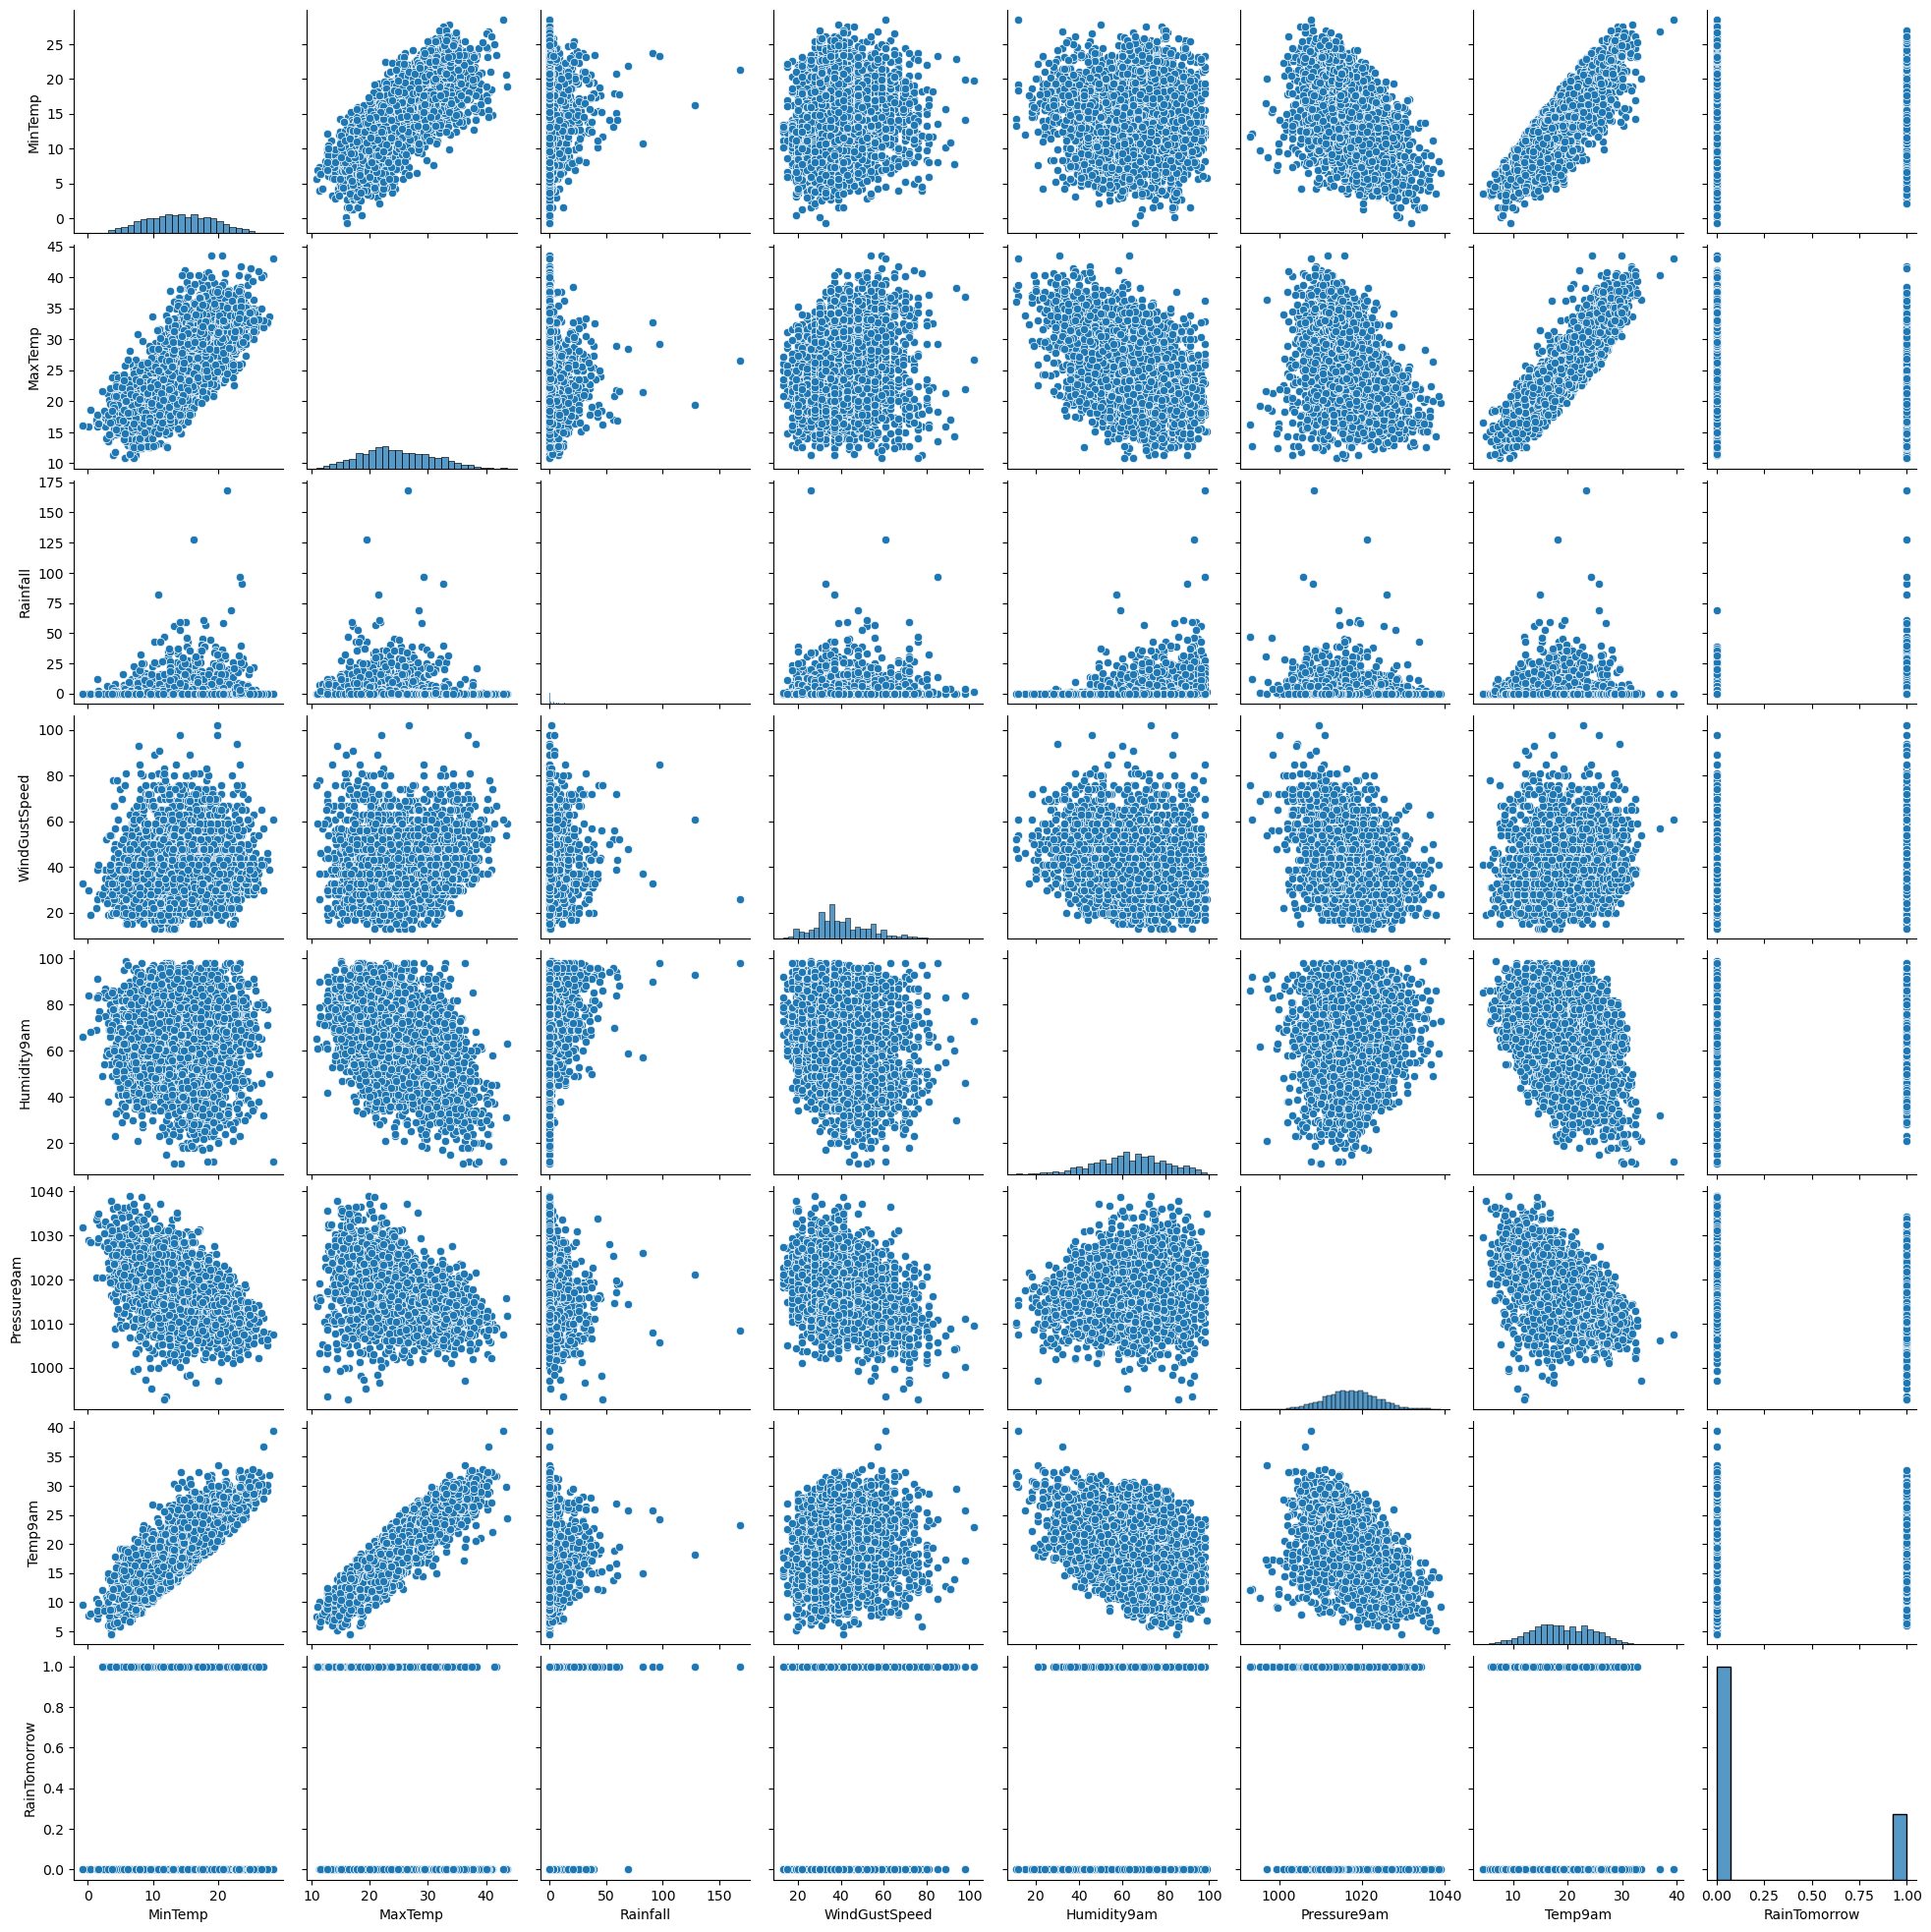

In [58]:
# Pairplot for selected features
sns.pairplot(data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Temp9am', 'RainTomorrow']])
plt.show()

In [59]:
# Feature selection
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Model for Rain Tomorrow Prediction
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
# Model for Rainfall Prediction
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)


In [63]:
# Classification Report for Rain Tomorrow Prediction
print("Classification Report for Rain Tomorrow Prediction:\n", classification_report(y_test, y_pred))

Classification Report for Rain Tomorrow Prediction:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.83      0.71      0.76       178

    accuracy                           0.90       758
   macro avg       0.87      0.83      0.85       758
weighted avg       0.89      0.90      0.89       758



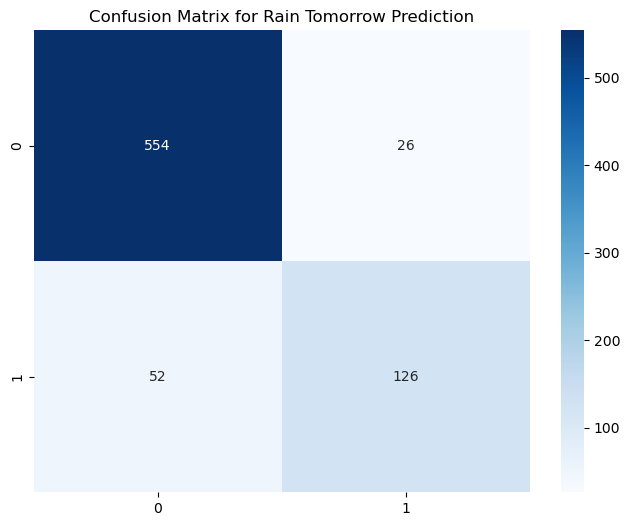

In [64]:
# Confusion Matrix for Rain Tomorrow Prediction
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Rain Tomorrow Prediction')
plt.show()

In [65]:
# Regression Metrics for Rainfall Prediction
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error for Rainfall Prediction: {mse}")

Mean Squared Error for Rainfall Prediction: 0.08388416886543536


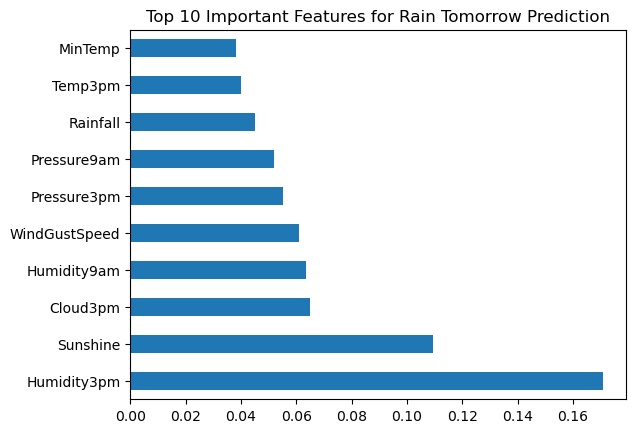

In [66]:
# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Rain Tomorrow Prediction')
plt.show()